In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import time
%matplotlib inline

In [2]:
heart_2020 = pd.read_csv('heart_2020_cleaned.csv')
heart_2022 = pd.read_csv('heart_2022_no_nans.csv')

In [3]:
heart_2020

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [53]:
print(str(heart_2020['Smoking'].value_counts()) + '\n')
print(str(heart_2020['AlcoholDrinking'].value_counts()) + '\n')
print(str(heart_2020['Stroke'].value_counts()) + '\n')
print(str(heart_2020['PhysicalHealth'].value_counts()) + '\n') # might consider dropping, lots of zeroes
print(str(heart_2020['MentalHealth'].value_counts()) + '\n') # might consider dropping, lots of zeroes
print(str(heart_2020['DiffWalking'].value_counts()) + '\n')
print(str(heart_2020['Sex'].value_counts()) + '\n')
print(str(heart_2020['AgeCategory'].value_counts()) + '\n')
print(str(heart_2020['Race'].value_counts()) + '\n')
print(str(heart_2020['Diabetic'].value_counts()) + '\n')
print(str(heart_2020['GenHealth'].value_counts()) + '\n')
print(str(heart_2020['Asthma'].value_counts()) + '\n')
print(str(heart_2020['KidneyDisease'].value_counts()) + '\n')
print(str(heart_2020['SkinCancer'].value_counts()) + '\n')

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

PhysicalHealth
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: count, dtype: int64

MentalHealth
0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317

In [4]:
# Your dictionary for encoding
d = {'HeartDisease': 'Leave',
    'BMI': 'Leave',
    'Smoking': 'OneHot',
    'AlcoholDrinking': 'OneHot', 
    'Stroke': 'OneHot',
    'PhysicalHealth': 'Leave', 
    'MentalHealth': 'Leave', 
    'DiffWalking': 'OneHot', 
    'Sex': 'OneHot', 
    'AgeCategory': 'OneHot',
    'Race': 'OneHot', 
    'Diabetic': 'OneHot', 
    'PhysicalActivity': 'OneHot', 
    'GenHealth': 'Ordinal', 
    'SleepTime': 'Leave',
    'Asthma': 'OneHot', 
    'KidneyDisease': 'OneHot', 
    'SkinCancer': 'OneHot'
    }

# Your dictionary for 'GenHealth' ordinal encoding
d_GenHealth = {
    'Excellent': 5,
    'Very good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}

In [5]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Initialize an empty DataFrame to store the final encoded data
# Copy the columns you want to 'Leave' from the original DataFrame
leave_columns = [item for item, action in d.items() if action == 'Leave']
heart_2020_encoded = heart_2020[leave_columns].copy()

# Loop through the dictionary to encode variables accordingly
for item in d:
    
    if d[item] == 'OneHot':
        one_hot_encoded = encoder.fit_transform(heart_2020[[item]])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([item]))
        # Concatenate the one-hot encoded columns to the new DataFrame
        heart_2020_encoded = pd.concat([heart_2020_encoded, one_hot_df], axis=1)
    
    elif d[item] == 'Ordinal':
        heart_2020_encoded[item] = heart_2020[item].map(d_GenHealth)


In [6]:
heart_2020_encoded

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,GenHealth,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,No,16.60,3.0,30.0,5.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,4,0.0,1.0,1.0,0.0,0.0,1.0
1,No,20.34,0.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,4,1.0,0.0,1.0,0.0,1.0,0.0
2,No,26.58,20.0,30.0,8.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2,0.0,1.0,1.0,0.0,1.0,0.0
3,No,24.21,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,3,1.0,0.0,1.0,0.0,0.0,1.0
4,No,23.71,28.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,4,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,7.0,0.0,6.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,2,0.0,1.0,1.0,0.0,1.0,0.0
319791,No,29.84,0.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,4,0.0,1.0,1.0,0.0,1.0,0.0
319792,No,24.24,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,3,1.0,0.0,1.0,0.0,1.0,0.0
319793,No,32.81,0.0,0.0,12.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,3,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
X = heart_2020_encoded.drop('HeartDisease', axis=1)
y = heart_2020_encoded['HeartDisease']

In [79]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test (60 train - 40 test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)
X_train.shape, X_test.shape

#((training size),(testing size))

((287815, 46), (31980, 46))

In [80]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=12,
                                       n_estimators=100, oob_score=True)
start_time = time.time()
forest.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Elapsed time to fit model: {elapsed_time:.3f} seconds")

Elapsed time to fit model: 17.355 seconds


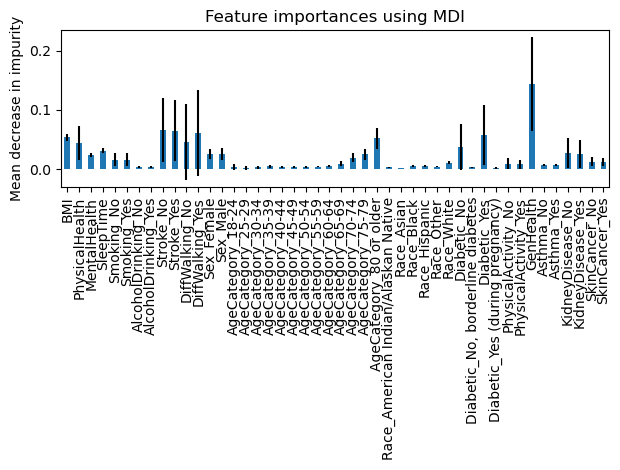

In [82]:
# Feature Importances using Mean Decrease in Impurity (MDI)
# Higher mean decrease in impurity = more important feature

feature_names = feature_names = list(X.columns)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Elapsed time to compute the importances: 93.781 seconds


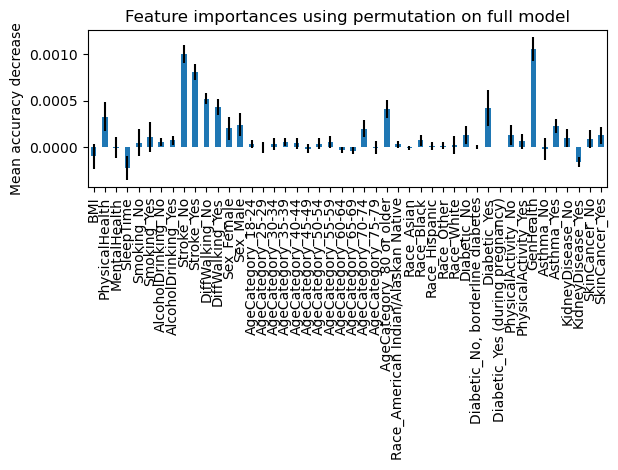

In [83]:
# Feature Importances using Feature Permuation
# Higher mean accuracy decrease = more important feature


from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = forest.predict(X_test)


# Accuracy: The percentage of correct predictions out of all predictions.
# (True Positives and True Negatives) / (all predictions)
# "How often does model guess correctly overall"
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision: The percentage of true positive predictions among the instances that the model predicted as positive.
# (True Positives) / (True and False Positives)
# "When model predicts the positive class, how often is it right"
precision = precision_score(y_test, y_pred, pos_label='Yes')
print(f'Precision: {precision}')

# Recall(Sensitivity or True Positive Rate): The percentage of true positive predictions among the actual positive instances.
# (True Positives) / (True Positives and False Negatives)
# "Did model identify all the True Positives"
recall = recall_score(y_test, y_pred, pos_label='Yes')
print(f'Recall(Sensitivity): {recall}')

# F1-Score: The harmonic mean of Precision and Recall.
# 2* (Precision * Recall)/(Precision + Recall)
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print(f'F1 Score: {f1}')

Accuracy: 0.9122263914946842
Precision: 0.6445497630331753
Recall(Sensitivity): 0.04741980474198047
F1 Score: 0.0883403702500812


Confusion Matrix: 
[[29037    75]
 [ 2732   136]]


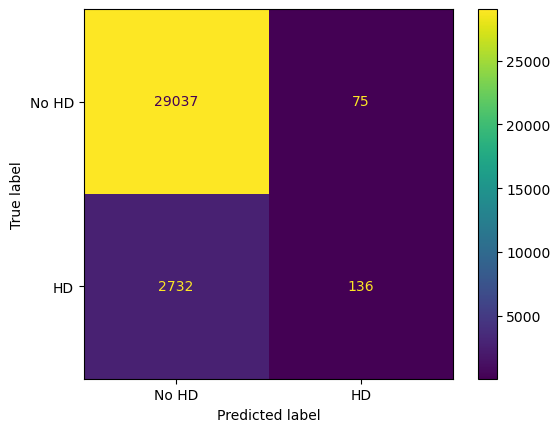

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')

# Diagonal represents number of elements for which the true class was predicted
# Off-diagonal represents misclassifications
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No HD', 'HD'])

cm_display.plot()
plt.show()

# [True Neg] [False Pos]
# [False Neg] [True Pos]

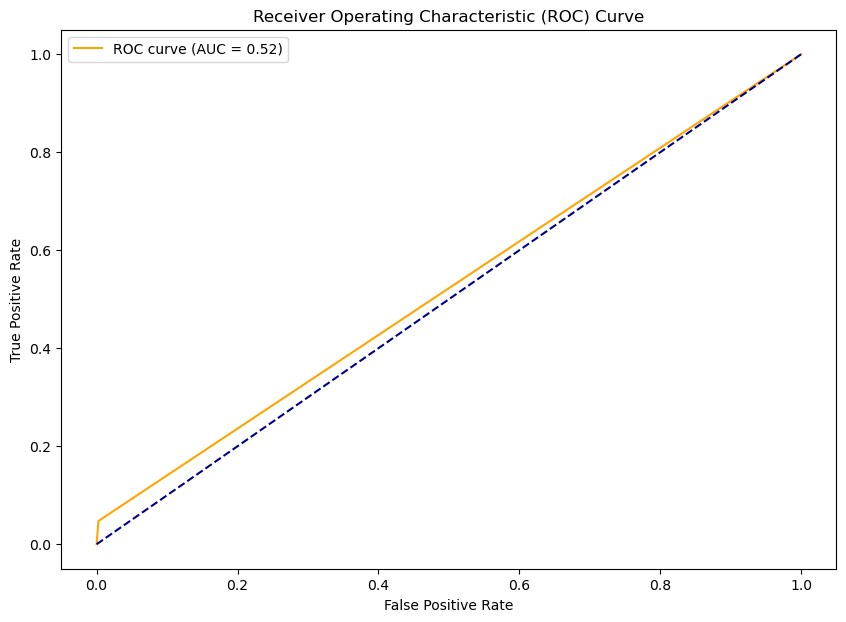

AUC Score: 0.5224217737642302


In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve: A graphical representation of the true positive rate against the false positive rate.
# AUC: Area Under the Curve, a single value summarizing the performance of the classifier.

# Convert string labels to numerical labels
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)
auc = roc_auc_score(y_test_numeric, y_pred_numeric)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f'AUC Score: {auc}')

In [88]:
from sklearn.metrics import log_loss

# Logarithm of the likelihood function, useful for probabilistic classifiers.

# Get predicted probabilities
y_pred_prob = forest.predict_proba(X_test)  # Assuming classifier_rf is your trained RandomForestClassifier

# Compute log loss
loss = log_loss(y_test, y_pred_prob)

print(f'Log Loss: {loss}')

Log Loss: 0.24016320771346378


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.91      1.00      0.95     29112
         Yes       0.64      0.05      0.09      2868

    accuracy                           0.91     31980
   macro avg       0.78      0.52      0.52     31980
weighted avg       0.89      0.91      0.88     31980



In [90]:
from sklearn.metrics import matthews_corrcoef

# A balanced measure for binary classification, especially useful if classes are imbalanced.
mcc = matthews_corrcoef(y_test, y_pred) 
print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 0.15826415258470292


In [91]:
from sklearn.metrics import balanced_accuracy_score

# The arithmetic mean of sensitivity (true positive rate) and specificity (true negative rate), useful for imbalanced datasets.
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy Score: {balanced_accuracy}')

Balanced Accuracy Score: 0.5224217737642302
